In [38]:

import pandas as pd

temperature_read_csv = pd.read_csv('GlobalLandTemperaturesByCity.csv')
# View the first few rows of the dataset
print(temperature_read_csv.head())

# Get some basic info about the dataset
print(temperature_read_csv.info())


           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                

In [39]:
# we convert the 'dt' time to datetime format so that we can use it for time series analysis
temperature_read_csv['dt'] = pd.to_datetime(temperature_read_csv['dt'])

# we extract the year out from the data column
temperature_read_csv['Year'] = temperature_read_csv['dt'].dt.year

# we group each of the years together and calculate the respective means
global_temp = temperature_read_csv.groupby('Year')['AverageTemperature'].mean()

# we reset the index so that we can use the year as a column
global_temp = global_temp.reset_index()

# we remove the rows with missing values
global_temp = global_temp.dropna()

# display the first few rows of the dataset
print(global_temp.head())


   year  AverageTemperature
0  1743            4.882424
1  1744           10.734047
2  1745            1.497593
7  1750            9.872808
8  1751           10.046739


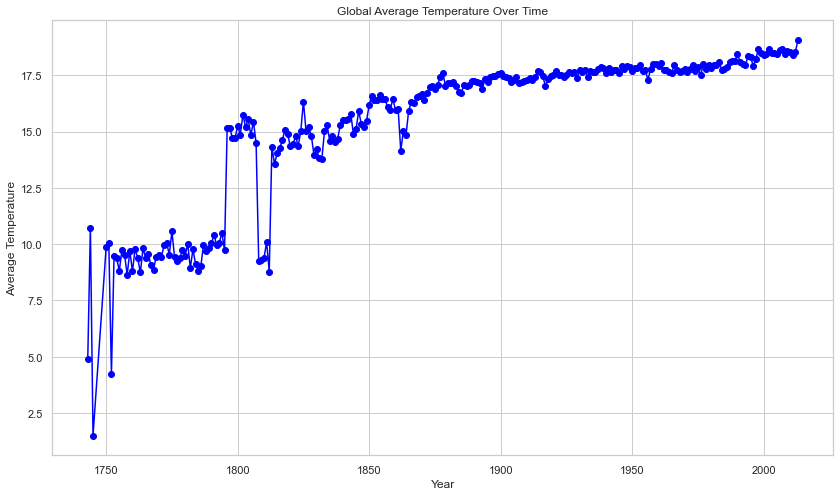

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(14, 8))
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.plot(global_temp['year'], global_temp['AverageTemperature'], color='blue', marker='o')
plt.show()


# Global Average Temperature Trends
The plot above shows the trend of global average temperatures over time. We can observe an upward trend, which indicates global warming as the average temperatures have increased consistently over the years.


/Users/atiyamahboob/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/atiyamahboob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


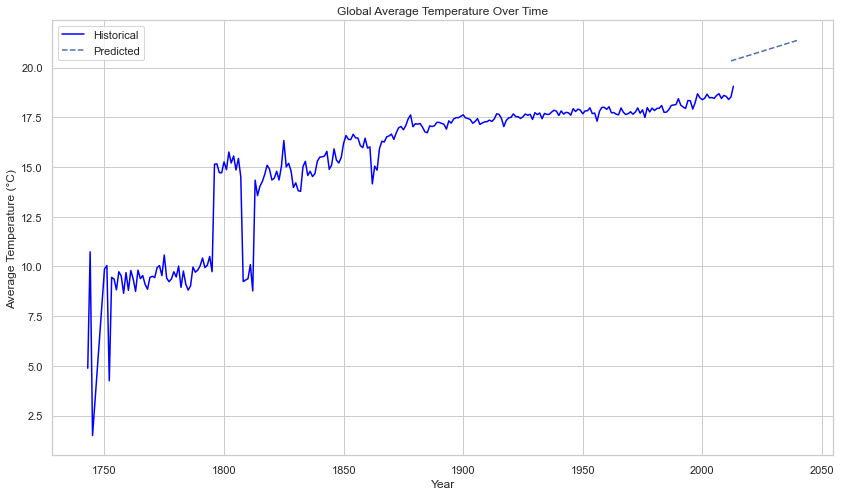

In [41]:
# we can use linear regression to predict the future temperature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# we prepare the data for linear regression
X = global_temp['Year'].values.reshape(-1, 1)
y = global_temp['AverageTemperature'].values

# we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict temperature anomalies for future years
# we conver the range of years to a nump array before we can use it for prediction- that will get rid of possible errors/warnings in console.
future_years = pd.DataFrame(np.arange(2012, 2041), columns=['Year'])  # 'year' should be 'Year' for consistency
future_predictions = model.predict(future_years)

# plot the data and the future predictions
plt.figure(figsize=(14, 8))
sns.lineplot(global_temp['Year'], global_temp['AverageTemperature'], label='Historical', color='blue')
sns.lineplot(x=future_years['Year'], y=future_predictions, label= 'Predicted',linestyle='--') 
# plot the future predictions
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [42]:
# Incorporating C02 emissions data

c02_data = pd.read_csv('CO2_emission.csv')
print(c02_data.head())

  Country Name country_code                     Region  \
0        Aruba          ABW  Latin America & Caribbean   
1  Afghanistan          AFG                 South Asia   
2       Angola          AGO         Sub-Saharan Africa   
3      Albania          ALB      Europe & Central Asia   
4      Andorra          AND      Europe & Central Asia   

                           Indicator Name      1990      1991      1992  \
0  CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1  CO2 emissions (metric tons per capita)  0.191745  0.167682  0.095958   
2  CO2 emissions (metric tons per capita)  0.553662  0.544539  0.543557   
3  CO2 emissions (metric tons per capita)  1.819542  1.242810  0.683700   
4  CO2 emissions (metric tons per capita)  7.521832  7.235379  6.963079   

       1993      1994      1995  ...      2011      2012      2013      2014  \
0       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
1  0.084721  0.075546  0.068468  ...  0.

In [43]:
# we want to take the average of the CO2 emissions for each year
# then plot the data, so x is year and y is average CO2 emissions
# This function reshapes the DataDrame from wide format to long format. We specify id_vars to keep the columns 'Country Name', 'country_code', 'Region', 'Indicator Name' as they are
# Whereas the year columns are transferred into a single column called 'Year'
co2_data_melted = pd.melt(c02_data, 
                          id_vars=['Country Name', 'country_code', 'Region', 'Indicator Name'],
                          var_name='Year', 
                          value_name='CO2_Emissions')

# As we have multiple types of indicators, we only want to choose 1 so that we don't use mix together different types of data
co2_data_melted = co2_data_melted[co2_data_melted['Indicator Name'] == 'CO2 emissions (metric tons per capita)']

# we convert the 'Year' column to integer, as the current type of the data is string
co2_data_melted['Year'] = pd.to_numeric(co2_data_melted['Year'])

# first drop any missing values in C02 emissions
co2_data_melted = co2_data_melted.dropna(subset = ['CO2_Emissions'])

# we group the data by year and calculate the average CO2 emissions for each year
co2_data_grouped = co2_data_melted.groupby('Year')['CO2_Emissions'].mean()

print(co2_data_grouped)

Year
1990.0    4.404504
1991.0    4.290648
1992.0    4.174834
1993.0    4.085472
1994.0    4.045067
1995.0    4.136628
1996.0    4.211147
1997.0    4.250716
1998.0    4.282809
1999.0    4.265652
2000.0    4.244367
2001.0    4.323111
2002.0    4.349692
2003.0    4.466854
2004.0    4.505477
2005.0    4.525854
2006.0    4.590208
2007.0    4.558706
2008.0    4.532540
2009.0    4.636380
2010.0    4.399453
2011.0    4.392175
2012.0    4.440399
2013.0    4.326678
2014.0    4.226973
2015.0    4.184129
2016.0    4.195432
2017.0    4.199802
2018.0    4.164970
2019.0    4.115138
2019.1    4.115138
Name: CO2_Emissions, dtype: float64


/Users/atiyamahboob/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


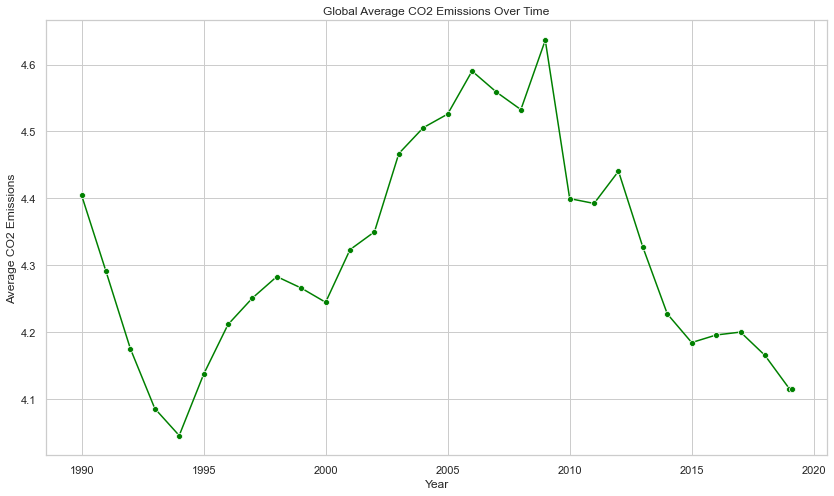

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(14, 8))
plt.title('Global Average CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions')
sns.lineplot(co2_data_grouped.index, co2_data_grouped.values, color='green', marker='o')
plt.show()


In [45]:
# now we want to correlate CO2 Emissions with Temperature Rise

# Merge C02 emissions data with global temperature data on the Year Column
combined_data = pd.merge(global_temp, co2_data_grouped, on = 'Year')

plt.figure(figsize=(14, 8))
sns.scatterplot(data = combined_data, x = 'CO2_Emissions', y = 'AverageTemperature')
plt.title('Global Average Temperature and CO2 Emissions Over Time')
plt.xlabel('C02 Emissions (million metric tons)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# calculate the correlation coefficient
correlation = combined_data['AverageTemperature'].corr(combined_data['CO2_Emissions'])
print(f"The correlation between CO2 emissions and average temperature is : {correlation}")


KeyError: 'Year'